In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [4]:
#quantum circuit to make a Bell State
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)

meas = QuantumCircuit(2,2)
meas.measure([0,1], [0,1])

#execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') #chosen device to run on
circ = bell + meas
result = execute(circ, backend, shots = 1000).result()
counts = result.get_counts(circ)
print(counts)

<ipython-input-4-e8a9cf98bc35>:11: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = bell + meas
C:\Users\metac\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


{'00': 516, '11': 484}


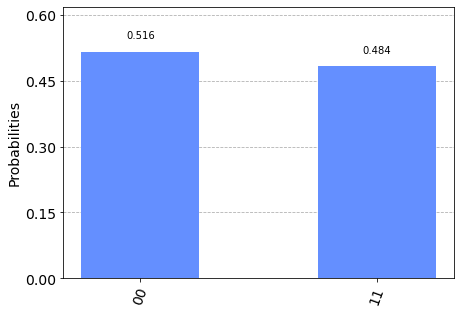

In [5]:
plot_histogram(counts)

In [6]:
circ.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

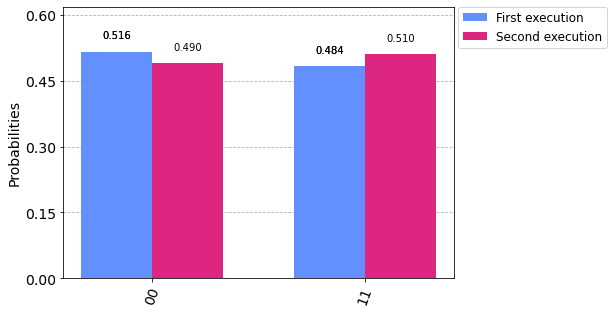

In [7]:
#execute 2-Qubit Bell state again
second_result = execute(circ, backend, shots = 1000).result()
second_counts = second_result.get_counts(circ)
#plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend = legend)

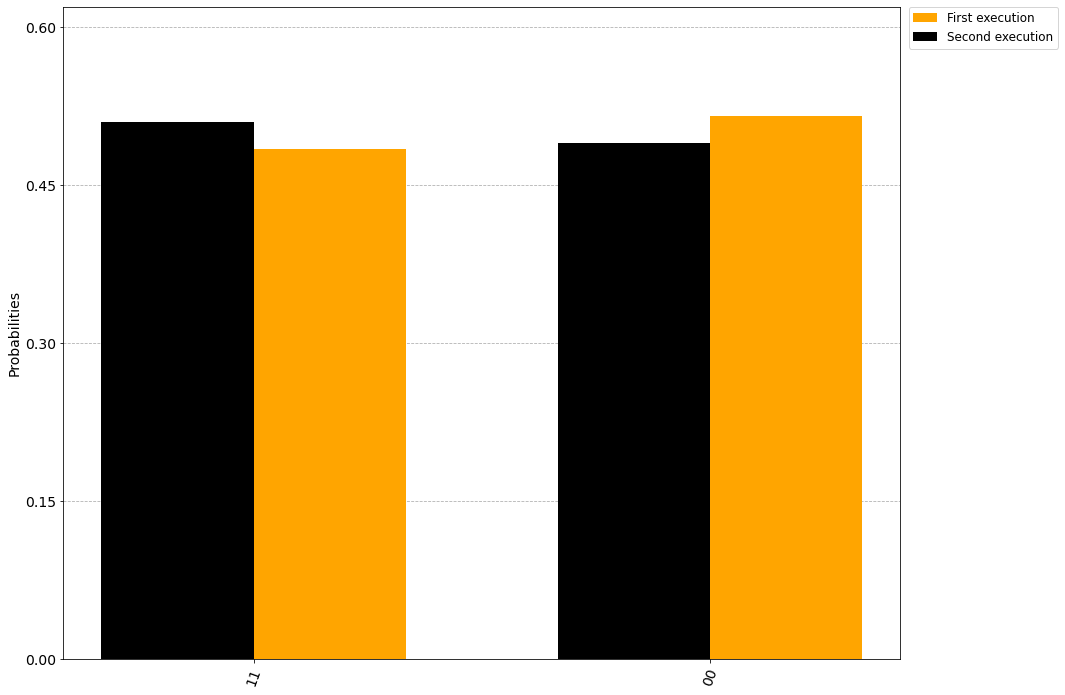

In [8]:
plot_histogram([counts, second_counts], legend = legend, sort = 'desc', figsize = (15, 12), color = ['orange', 'black'], bar_labels = False) 

#plot_state_city(quantum_state): Standard view for quantum states, real and imaginary parts are plotted like a city

#plot_state_qsphere(quantum_state): Unique Qiskit view of quantum state, amplitude and phase are plotted in sphere ball as thickness and color respectively

#plot_state_paulivec(quantum_state): Representation of state matrix using Pauli Operators as basis

#plot_state_hinton(quantum_state): Same as city, but size of element represents value of matrix element

#plot_bloch_mutivector(quantum_state): Projection of a quantum state the single qubit space and plotting on Bloch Sphere.

In [9]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere

In [10]:
#execute quantum circuit
backend = BasicAer.get_backend('statevector_simulator') #device to run on
result = execute(bell, backend).result()
psi = result.get_statevector(bell)

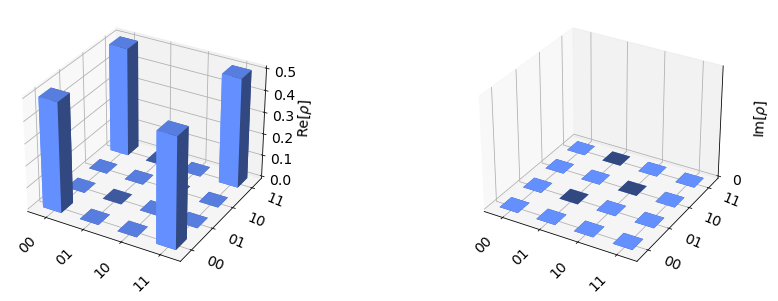

In [11]:
#plot_state_city()
#title<String>: String representing the plot title
#figsize<tuple>: Figure size in inches (width, height)
#color(list): list of len = 2 granting colors to real and imaginary components of matrix elements
plot_state_city(psi, title = "My City", color = ['purple', 'orange'])

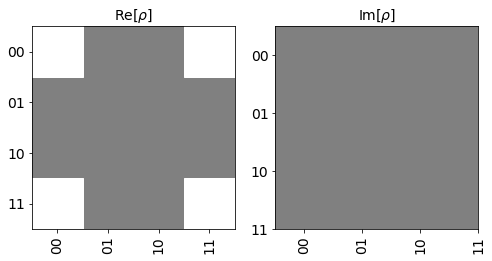

In [12]:
plot_state_hinton(psi, title = "My Hinton")
#title<String>: String representing the plot title
#figsize<tuple>: Figure size in inches (width, height)

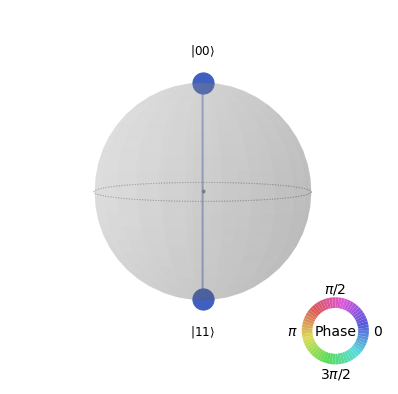

In [13]:
plot_state_qsphere(psi)
#figsize<tuple>: Figure size in inches (width, height)

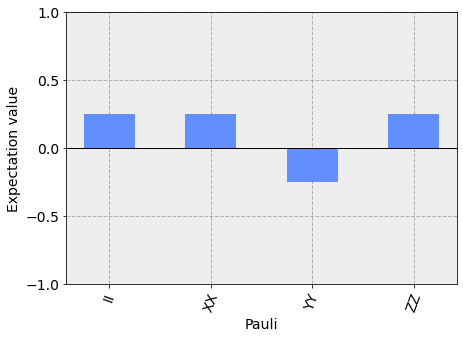

In [14]:
plot_state_paulivec(psi)
#title<String>: String representing the plot title
#figsize<tuple>: Figure size in inches (width, height)
#color<list or String>: Color of the expectation value bars

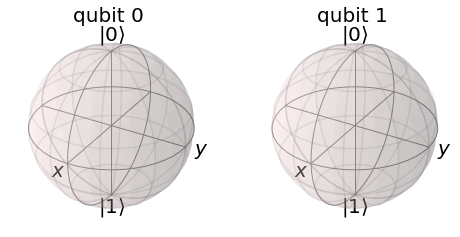

In [15]:
plot_bloch_multivector(psi)
#title<String>: String representing the plot title

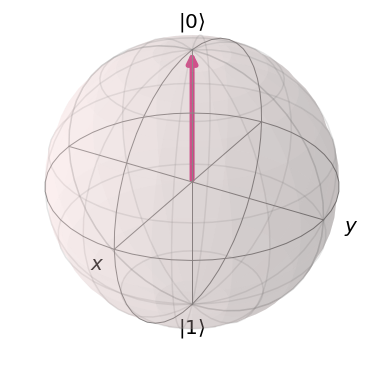

In [4]:
# WHEN USING THESE PLOT FUNCTIONS, IT RETURNS A matplotlib.Figure, JUPYTER NOTEBOOKS auto recoognizes this
# and displays it. Outside of jupyter 
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([0,0,1])